# Class Activity 9: Time Series Forecasting

## Muasb - 29409

## Imports and tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [40]:
data_path = 'retail_sales_forecasting.csv'
data = pd.read_csv(data_path)

In [41]:
data['data'] = pd.to_datetime(data['data'])
data.set_index('data', inplace=True)

In [4]:
sales = data['venda']

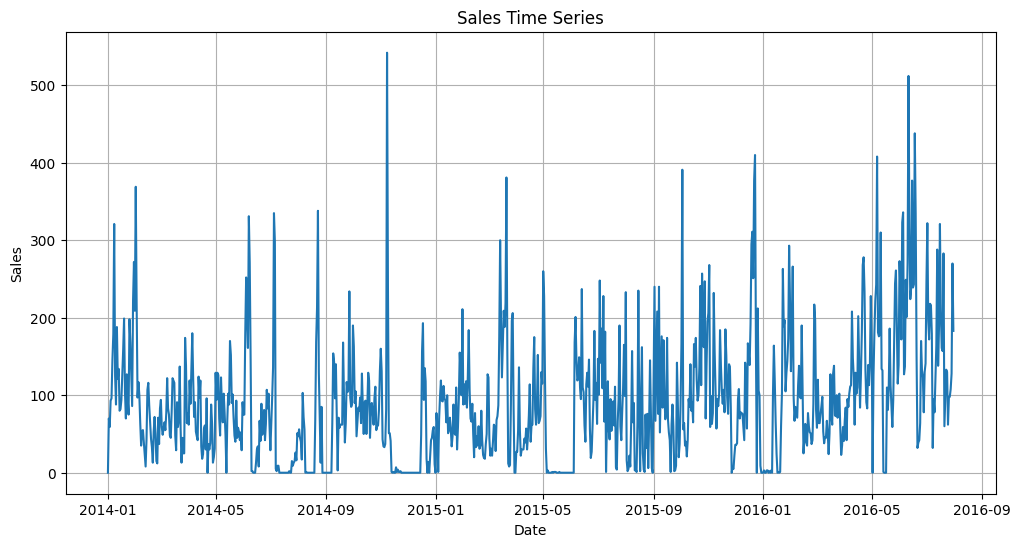

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(sales)
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [6]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

print("ADF Test for Original Series:")
adf_test(sales)

ADF Test for Original Series:
ADF Statistic: -5.3269022811894
p-value: 4.815089201365863e-06
Critical Values: {'1%': -3.437462363899248, '5%': -2.8646798473884134, '10%': -2.568441851017076}
The series is stationary.


In [7]:
sales_diff = sales.diff().dropna()

In [8]:
print("ADF Test for Differenced Series:")
adf_test(sales_diff)

ADF Test for Differenced Series:
ADF Statistic: -10.786555269254878
p-value: 2.1867302238469507e-19
Critical Values: {'1%': -3.437501253878553, '5%': -2.864696995470416, '10%': -2.568450985005155}
The series is stationary.


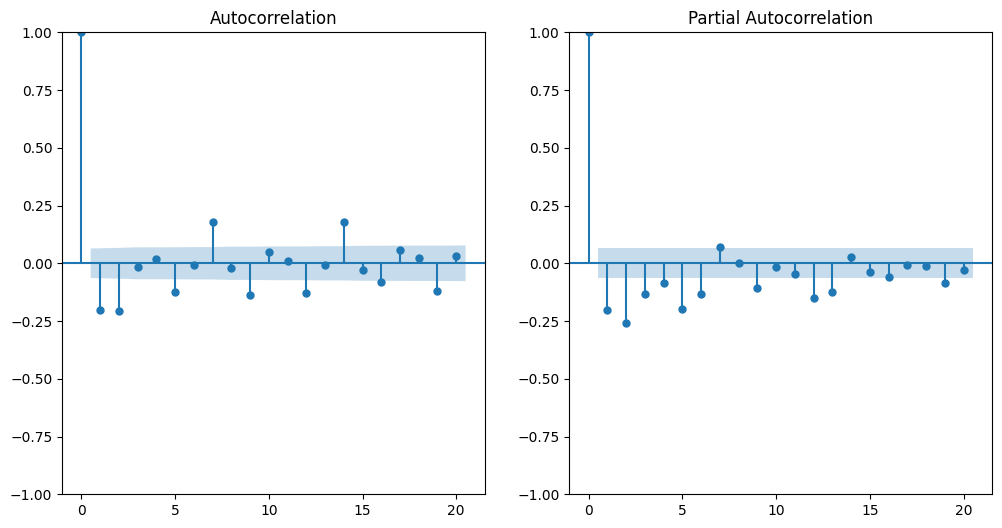

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(sales_diff, lags=20, ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(sales_diff, lags=20, ax=plt.gca())
plt.show()

# ARIMA

In [10]:
model = ARIMA(sales, order=(1, 1, 1))  # Example order: (p=1, d=1, q=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


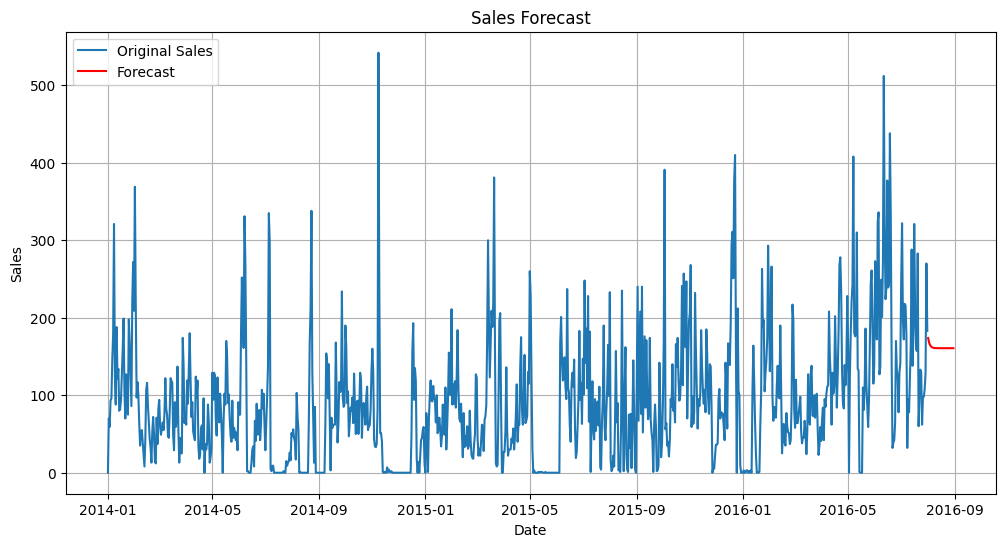

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(sales, label='Original Sales')
plt.plot(pd.date_range(sales.index[-1], periods=forecast_steps + 1, freq='D')[1:],
         forecast, color='red', label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
model = ARIMA(sales, order=(5, 1, 1))  # Example order: (p=1, d=1, q=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


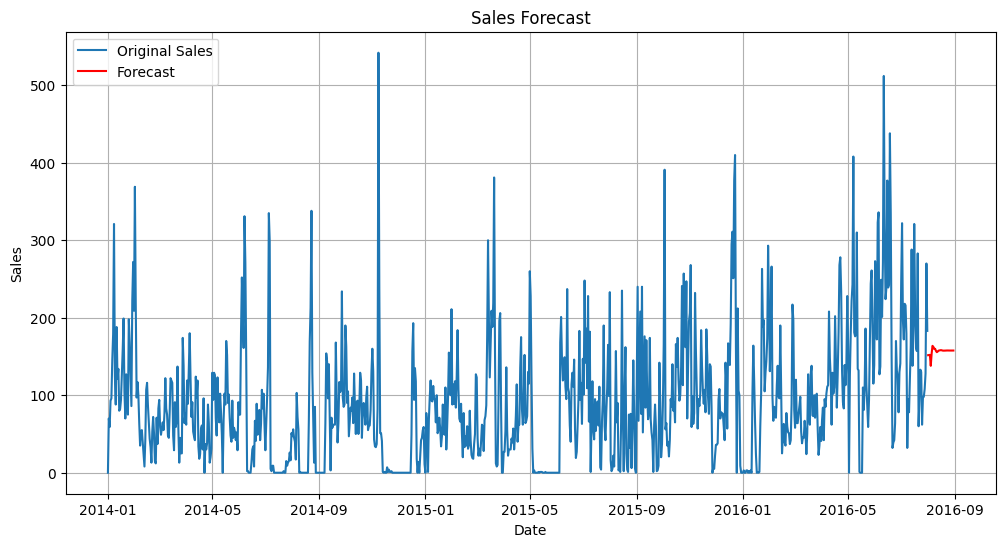

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(sales, label='Original Sales')
plt.plot(pd.date_range(sales.index[-1], periods=forecast_steps + 1, freq='D')[1:],
         forecast, color='red', label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = ARIMA(sales, order=(1, 1, 1))  # Example order: (p=1, d=1, q=1)
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

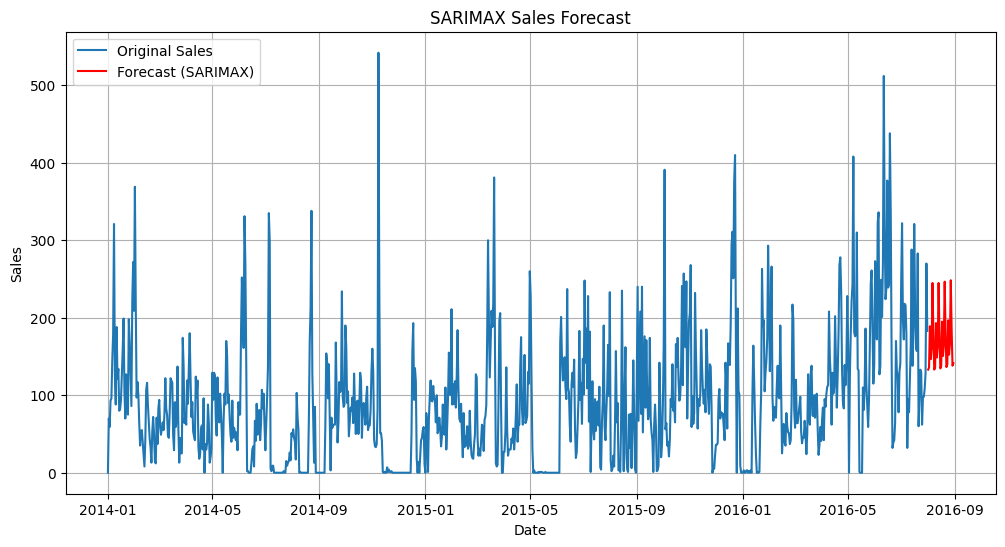

In [16]:
# Import required libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define exogenous variables
exog_variables = data[['estoque', 'preco']]

# Step 1: SARIMAX model configuration
# Set (p, d, q) and (P, D, Q, s) values
p, d, q = 1, 1, 1  # Non-seasonal ARIMA components
P, D, Q, s = 1, 1, 1, 7  # Seasonal components (7 days for weekly seasonality)

# Step 2: Build SARIMAX model
model_sarimax = SARIMAX(sales,
                        exog=exog_variables,  # Exogenous variables
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s))

# Step 3: Fit the model
model_fit_sarimax = model_sarimax.fit()

# Step 4: Forecast future values
forecast_steps = 30  # Forecast the next 30 days
future_exog = exog_variables[-1:].values.repeat(forecast_steps, axis=0)  # Use last exog values for simplicity

forecast = model_fit_sarimax.forecast(steps=forecast_steps, exog=future_exog)

# Step 5: Plot results
plt.figure(figsize=(12, 6))
plt.plot(sales, label='Original Sales')
plt.plot(pd.date_range(sales.index[-1], periods=forecast_steps + 1, freq='D')[1:],
         forecast, color='red', label='Forecast (SARIMAX)')
plt.title('SARIMAX Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


# SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

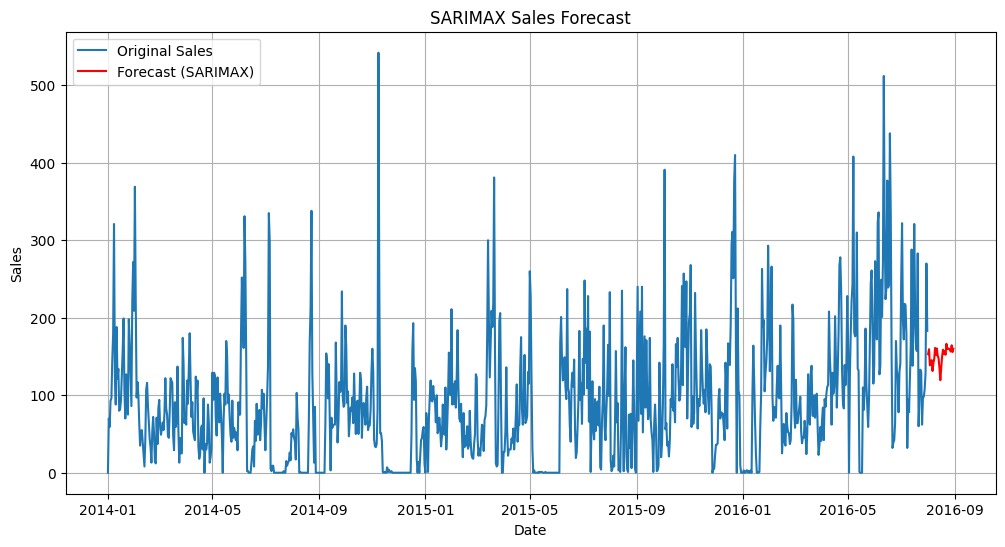

In [18]:
# Import required libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define exogenous variables
exog_variables = data[['estoque', 'preco']]

# Step 1: SARIMAX model configuration
# Set (p, d, q) and (P, D, Q, s) values
p, d, q = 1, 1, 1  # Non-seasonal ARIMA components
P, D, Q, s = 1, 1, 1, 30  # Seasonal components (120 days for quarterly seasonality)

# Step 2: Build SARIMAX model
model_sarimax = SARIMAX(sales,
                        exog=exog_variables,  # Exogenous variables
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, s))

# Step 3: Fit the model
model_fit_sarimax = model_sarimax.fit()

# Step 4: Forecast future values
forecast_steps = 30  # Forecast the next 30 days
future_exog = exog_variables[-1:].values.repeat(forecast_steps, axis=0)  # Use last exog values for simplicity

forecast = model_fit_sarimax.forecast(steps=forecast_steps, exog=future_exog)

# Step 5: Plot results
plt.figure(figsize=(12, 6))
plt.plot(sales, label='Original Sales')
plt.plot(pd.date_range(sales.index[-1], periods=forecast_steps + 1, freq='D')[1:],
         forecast, color='red', label='Forecast (SARIMAX)')
plt.title('SARIMAX Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


# Exponential Smoothing

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(sales,
                             trend='mul',
                             seasonal='mul',
                             seasonal_periods=7)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [31]:
model_fit = model.fit()

In [32]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


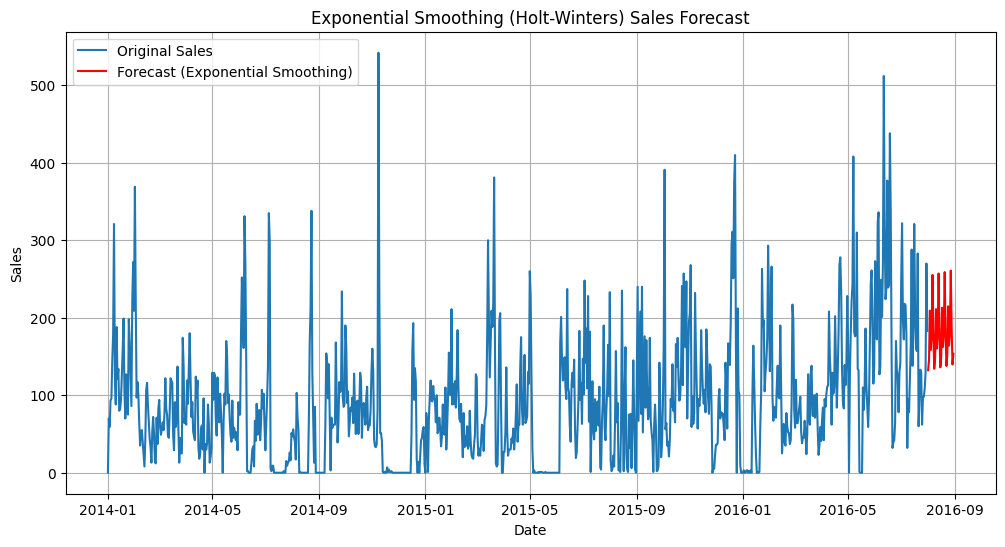

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(sales, label='Original Sales')
plt.plot(pd.date_range(sales.index[-1], periods=forecast_steps + 1, freq='D')[1:],
         forecast, color='red', label='Forecast (Exponential Smoothing)')
plt.title('Exponential Smoothing (Holt-Winters) Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Prophet

In [37]:
from prophet import Prophet
import pandas as pd

In [39]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [42]:
data_prophet = data[['venda']].reset_index()
data_prophet.columns = ['ds', 'y']  # Rename columns for Prophet

In [43]:
model = Prophet()

In [44]:
model.fit(data_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeylkq3z_/o5scl0xt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeylkq3z_/6lc40mxi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62992', 'data', 'file=/tmp/tmpeylkq3z_/o5scl0xt.json', 'init=/tmp/tmpeylkq3z_/6lc40mxi.json', 'output', 'file=/tmp/tmpeylkq3z_/prophet_modelrnnsk7ey/prophet_model-20241217183618.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:36:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:36:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [46]:
future = model.make_future_dataframe(periods=30)  # Forecast next 30 days

In [47]:
forecast = model.predict(future)

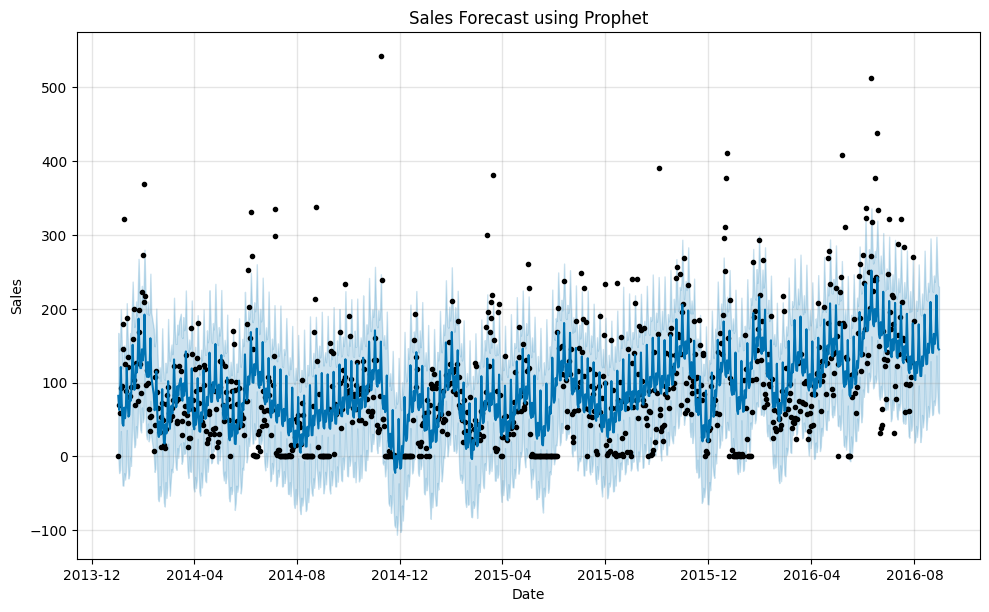

In [48]:
fig = model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [51]:
future = model.make_future_dataframe(periods=60)  # Forecast next 60 days

In [52]:
forecast = model.predict(future)

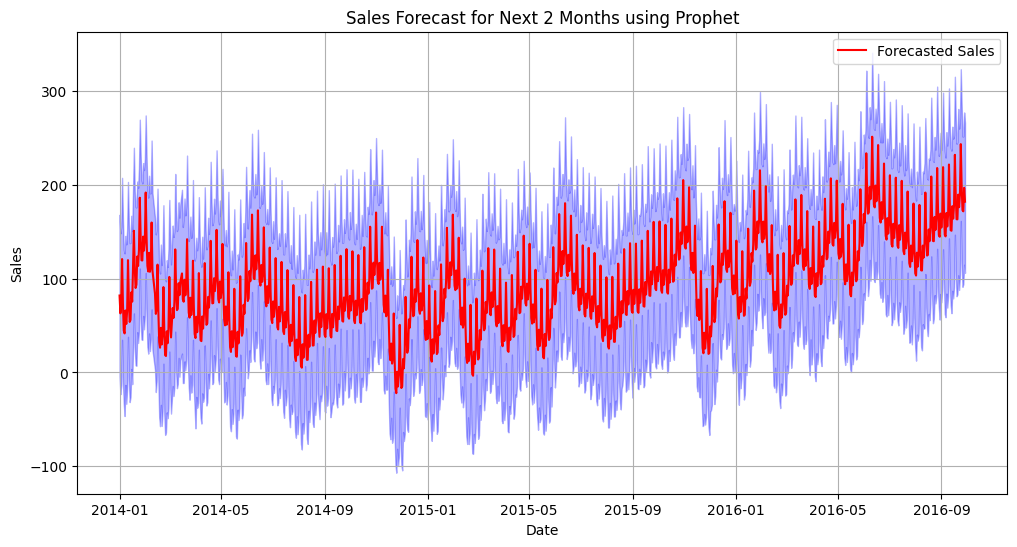

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.3)
plt.title('Sales Forecast for Next 2 Months using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
forecast_future = forecast[forecast['ds'] > data_prophet['ds'].max()]  # Get only future dates

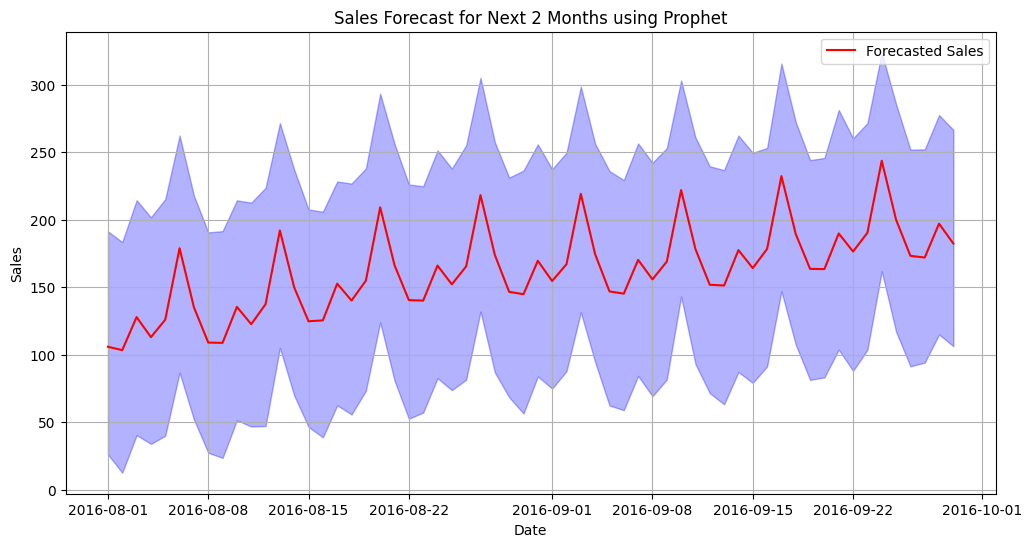

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(forecast_future['ds'], forecast_future['yhat'], label='Forecasted Sales', color='red')
plt.fill_between(forecast_future['ds'], forecast_future['yhat_lower'], forecast_future['yhat_upper'], color='blue', alpha=0.3)
plt.title('Sales Forecast for Next 2 Months using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()